In [7]:
#!pip install seaborn
#!pip install scikit-learn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [9]:
df_train = pd.read_csv('data/housing_prices/train.csv')
df_test = pd.read_csv('data/housing_prices/test.csv')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [94]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1201.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.352981,56.922550,70.049958,10514.183687,6.099383,5.575051,1971.276902,1984.884167,103.383873,443.867718,...,94.309116,46.611378,21.969157,3.411926,14.911583,2.760795,43.518849,6.325565,2007.814942,180950.956820
std,421.717131,42.304033,24.284752,9984.175653,1.383468,1.113125,30.211260,20.640489,180.763929,456.171244,...,125.357458,66.252389,61.137400,29.327247,55.483531,40.191018,496.291826,2.700957,1.328188,79461.599814
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.500000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,165.500000,712.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
categorical_columns = df_train.select_dtypes(include=['object', 'category'])
numeric_columns = df_train.select_dtypes(include=['number'])

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns.columns)

Categorical columns:      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     N

In [19]:
print('Numeric columns with NaN: ', numeric_columns.columns[numeric_columns.isnull().any()].tolist())
print('-------')
print('Categorical columns with NaN: ',categorical_columns.columns[categorical_columns.isnull().any()].tolist())

Numeric columns with NaN:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
-------
Categorical columns with NaN:  ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
for col in categorical_columns:
    print(f"{col}: {df_train[col].nunique()} unique value")

MSZoning: 5 unique value
Street: 2 unique value
Alley: 2 unique value
LotShape: 4 unique value
LandContour: 4 unique value
Utilities: 2 unique value
LotConfig: 5 unique value
LandSlope: 3 unique value
Neighborhood: 25 unique value
Condition1: 9 unique value
Condition2: 8 unique value
BldgType: 5 unique value
HouseStyle: 8 unique value
RoofStyle: 6 unique value
RoofMatl: 8 unique value
Exterior1st: 15 unique value
Exterior2nd: 16 unique value
MasVnrType: 3 unique value
ExterQual: 4 unique value
ExterCond: 5 unique value
Foundation: 6 unique value
BsmtQual: 4 unique value
BsmtCond: 4 unique value
BsmtExposure: 4 unique value
BsmtFinType1: 6 unique value
BsmtFinType2: 6 unique value
Heating: 6 unique value
HeatingQC: 5 unique value
CentralAir: 2 unique value
Electrical: 5 unique value
KitchenQual: 4 unique value
Functional: 7 unique value
FireplaceQu: 5 unique value
GarageType: 6 unique value
GarageFinish: 3 unique value
GarageQual: 5 unique value
GarageCond: 5 unique value
PavedDrive: 3 

In [21]:
for col in categorical_columns:
    print(f"Values in '{col}':")
    print(df_train[col].value_counts())
    print("\n")

Values in 'MSZoning':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Values in 'Street':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Values in 'Alley':
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Values in 'LotShape':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Values in 'LandContour':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Values in 'Utilities':
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Values in 'LotConfig':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Values in 'LandSlope':
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Values in 'Neighborhood':
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
N

In [23]:
for col in categorical_columns:
    value_counts = df_train[col].value_counts()
    rare_categories = value_counts[value_counts < 50].index
    df_train[col] = df_train[col].replace(rare_categories, 'Other')

for col in categorical_columns:
    df_train[col] = df_train[col].fillna('Other')

# Remove one row where variable 'Utilities' equals 'Other'
df_train = df_train[df_train['Utilities'] != 'Other']

### Checking for outliers

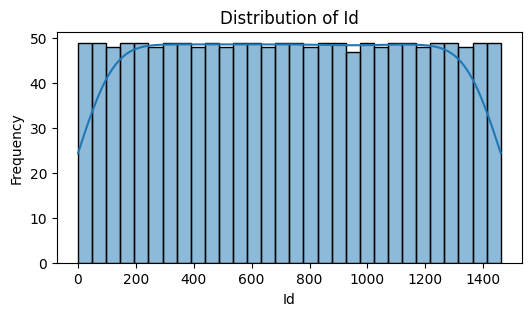

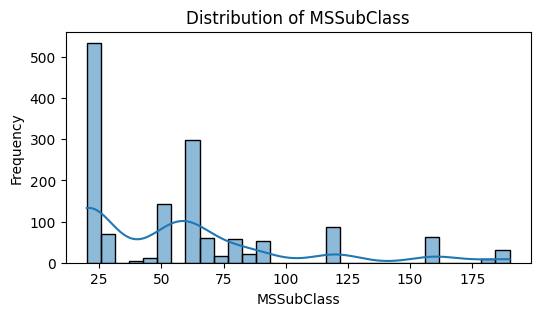

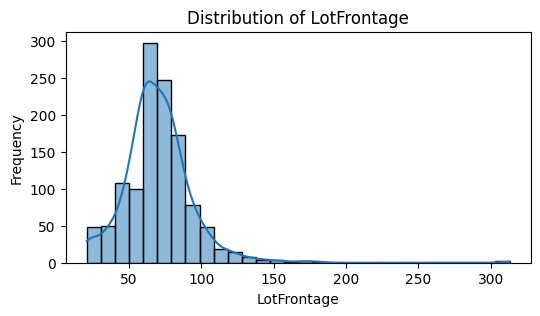

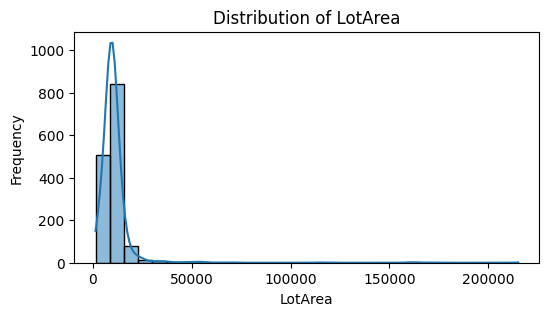

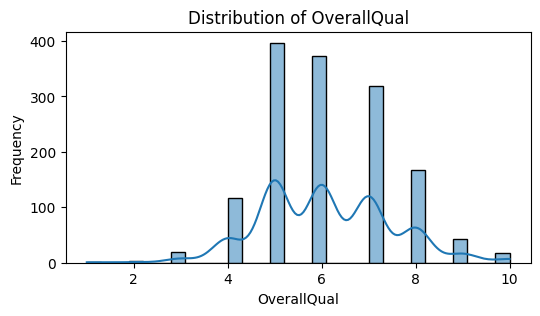

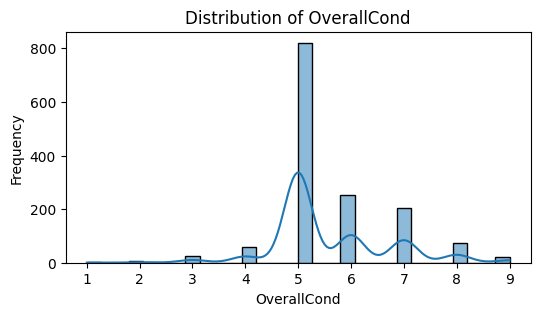

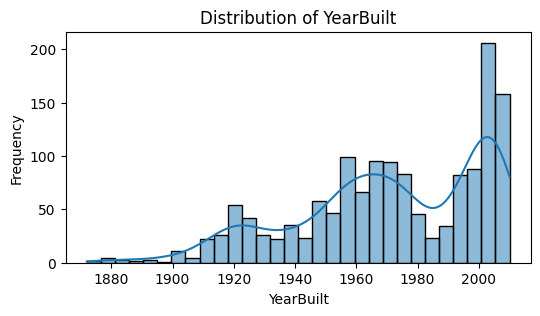

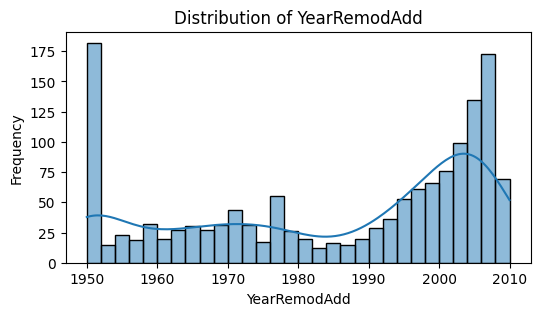

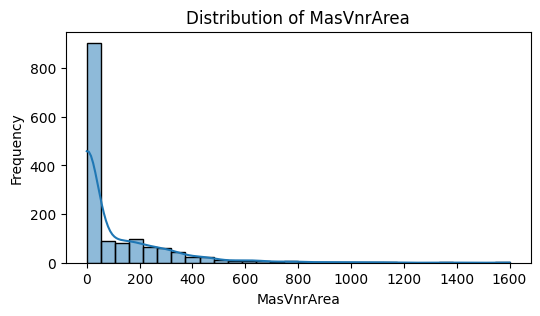

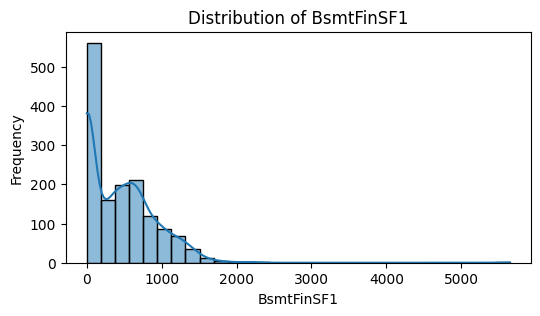

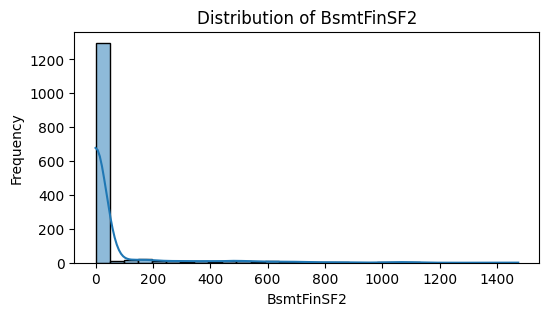

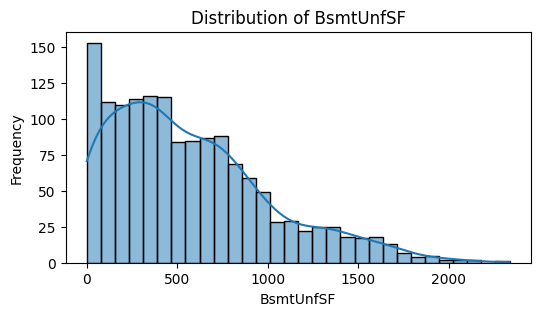

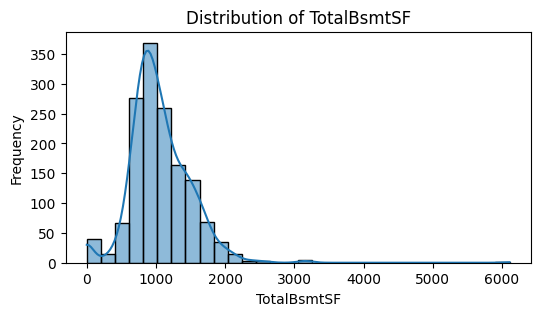

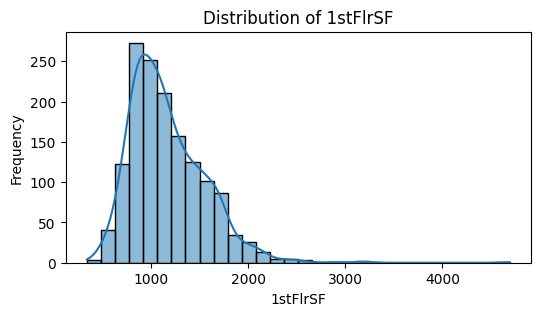

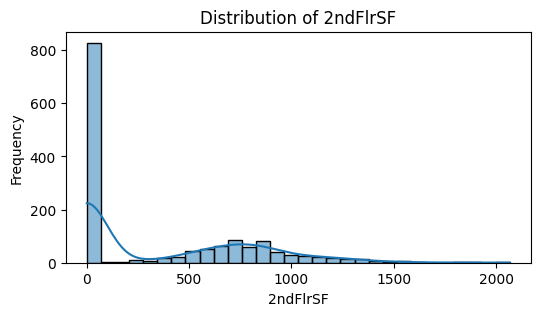

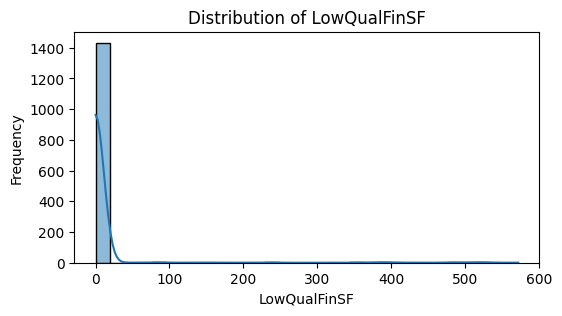

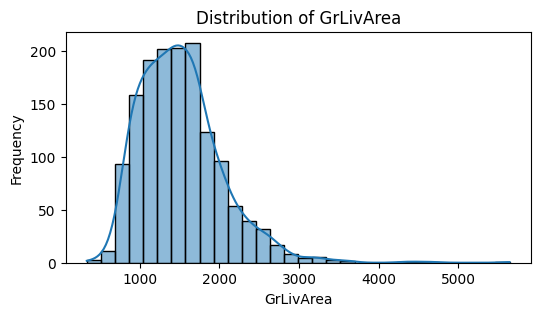

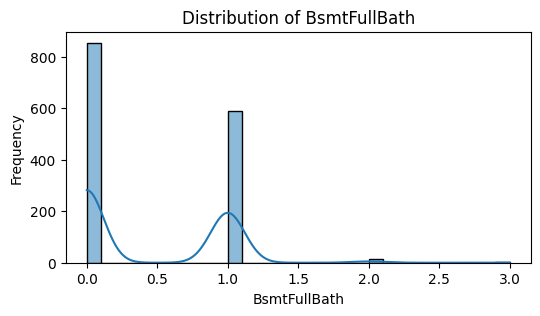

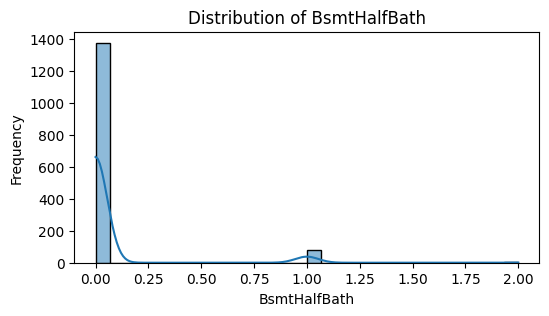

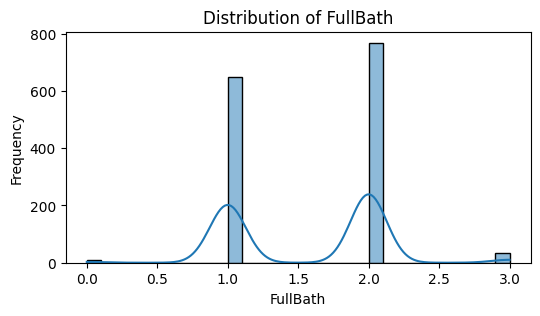

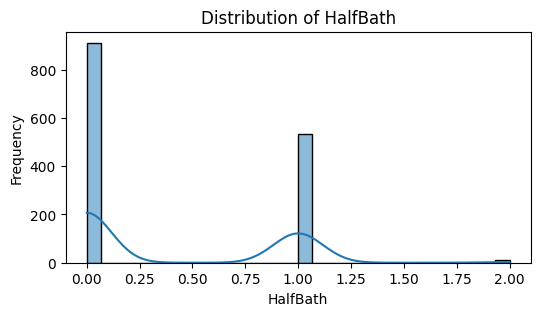

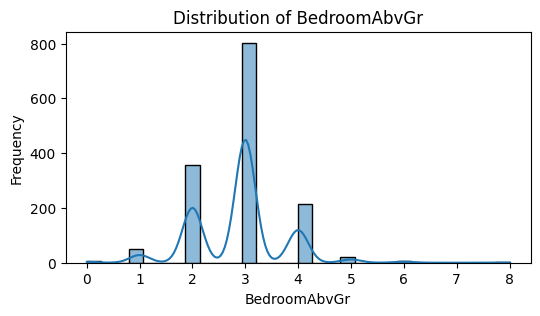

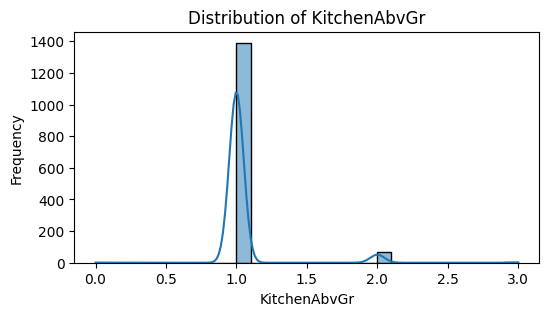

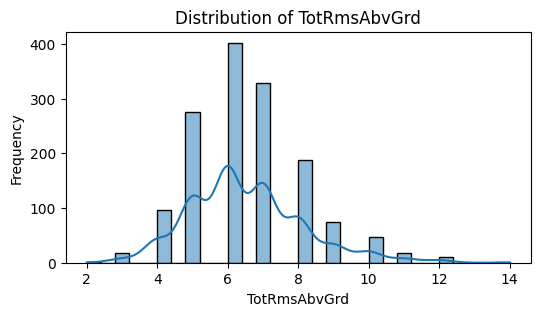

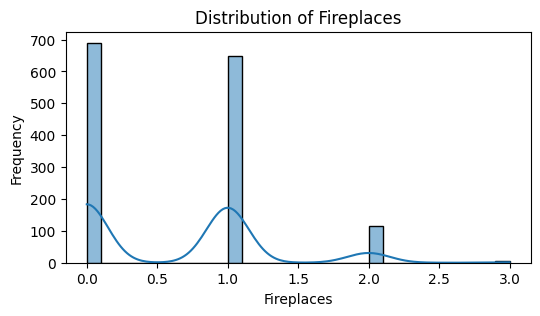

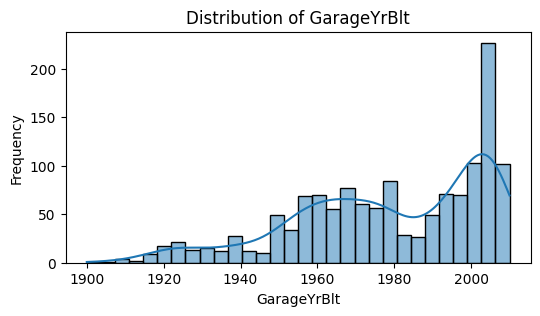

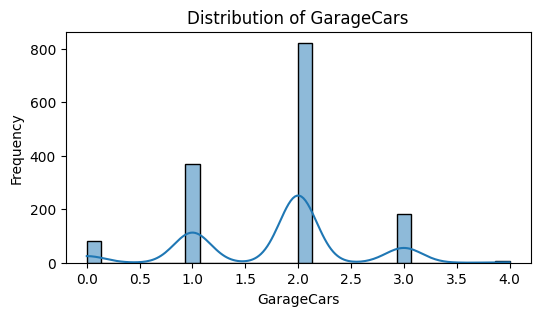

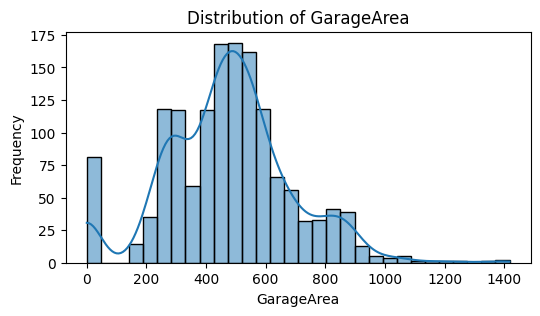

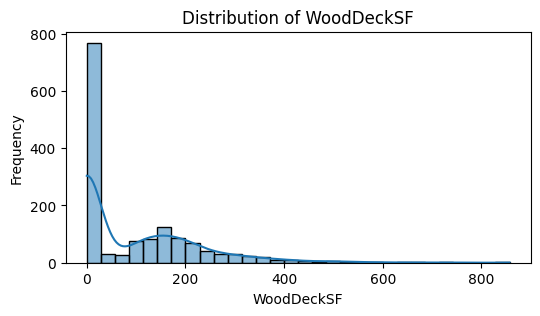

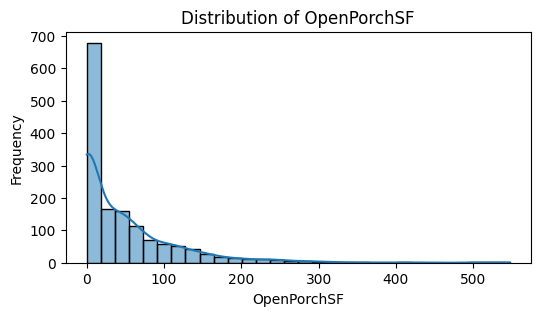

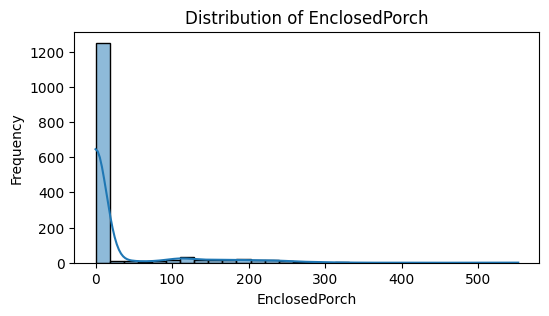

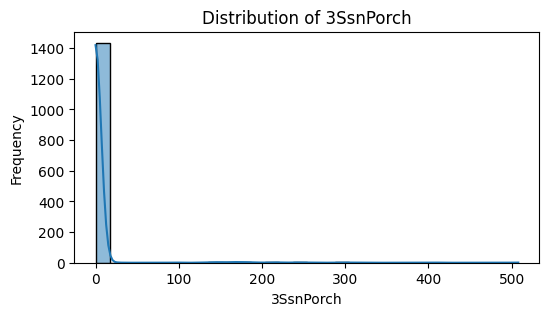

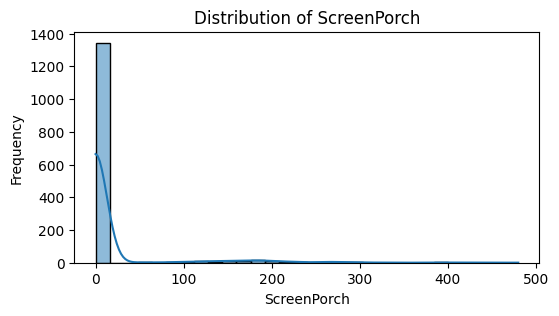

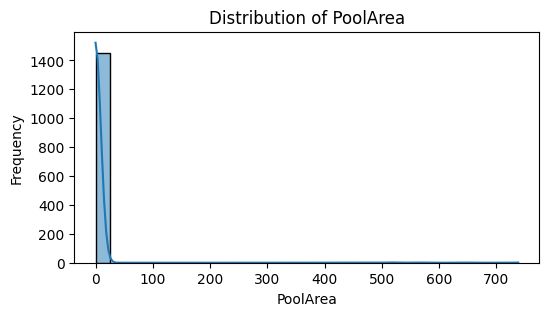

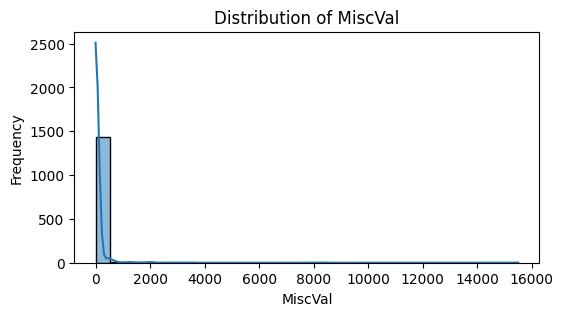

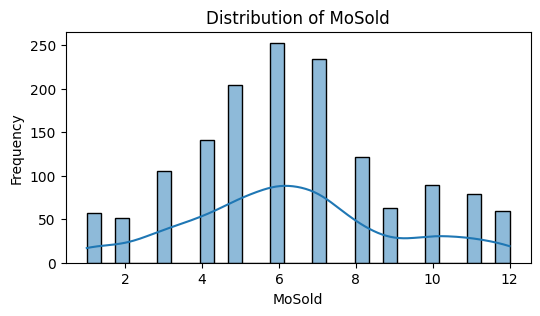

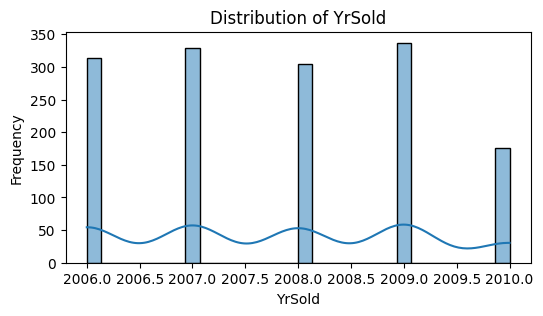

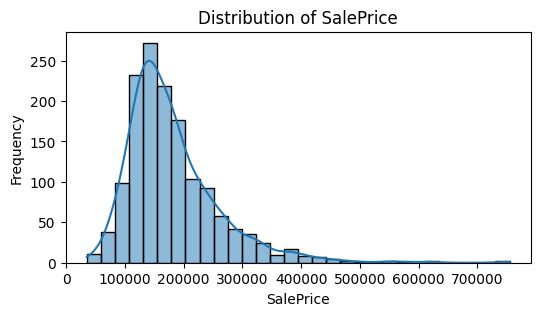

In [24]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

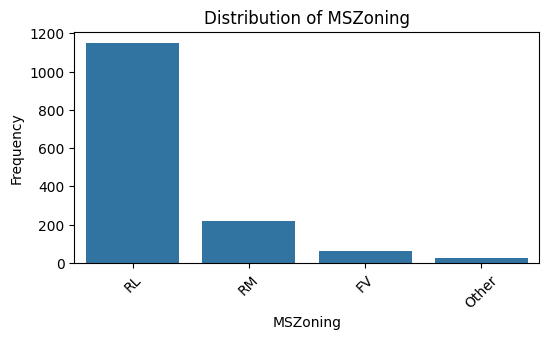

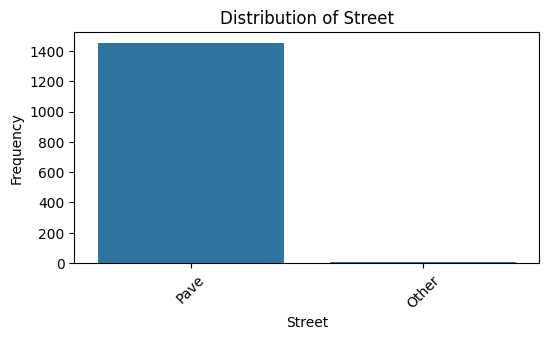

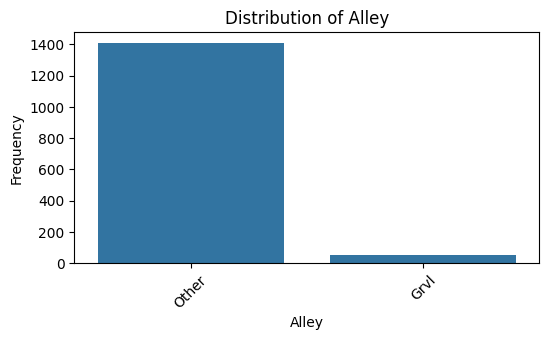

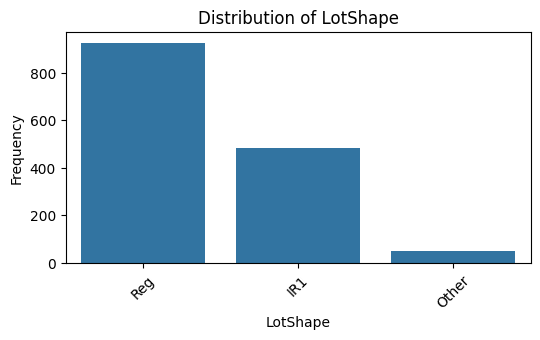

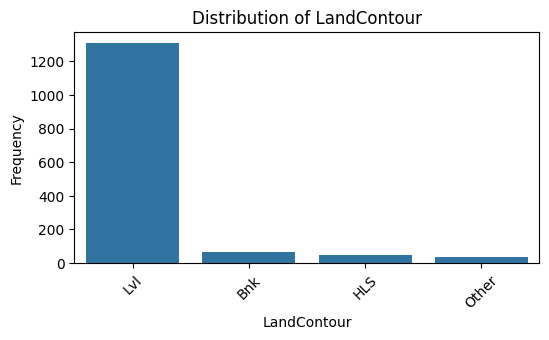

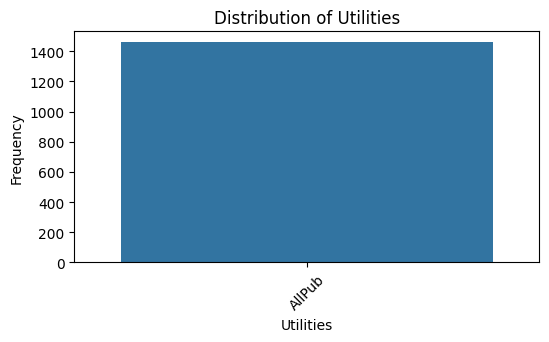

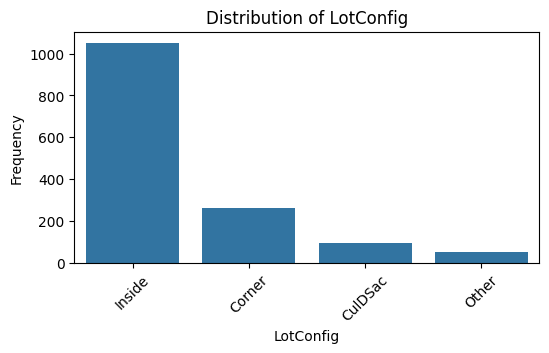

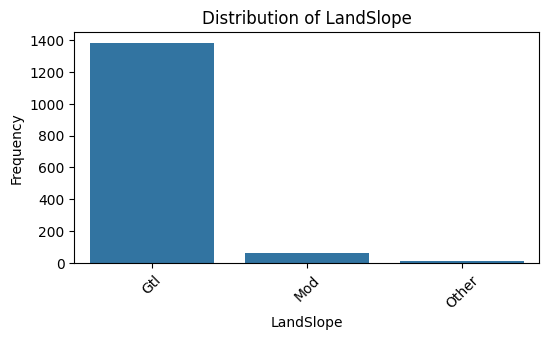

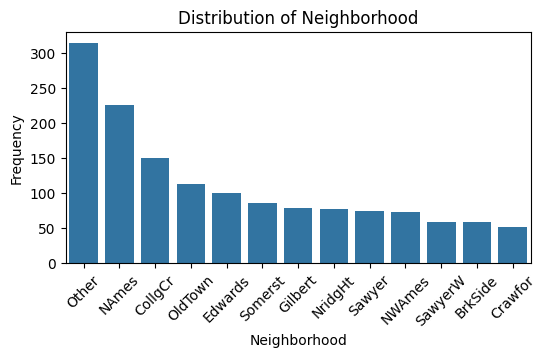

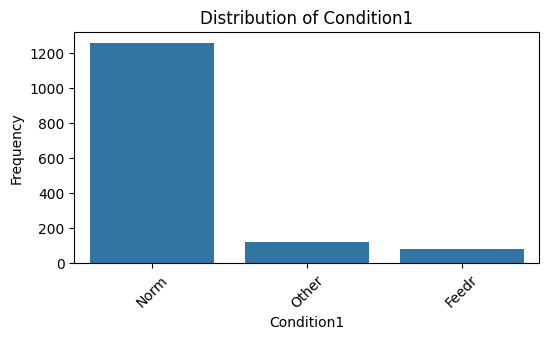

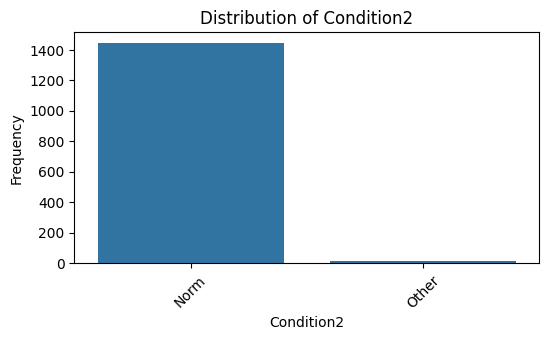

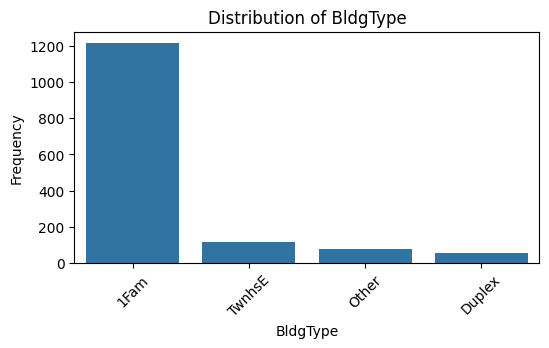

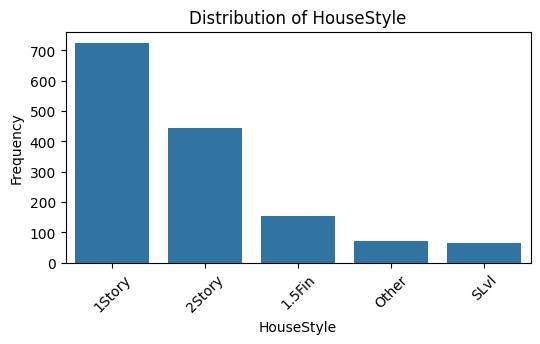

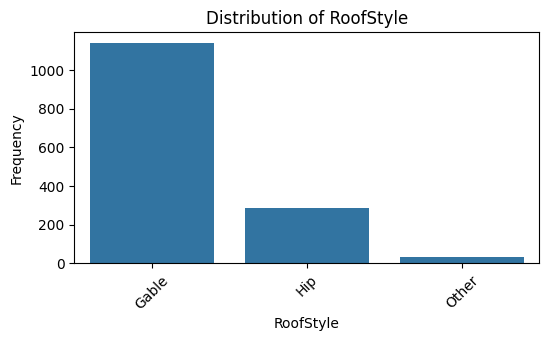

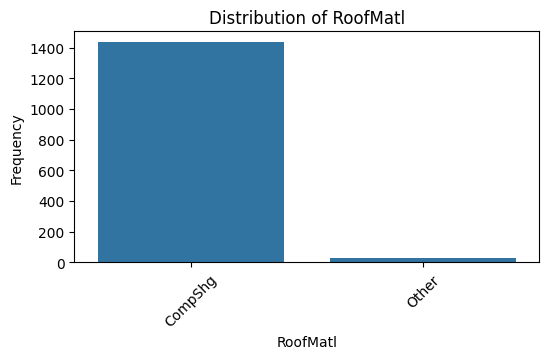

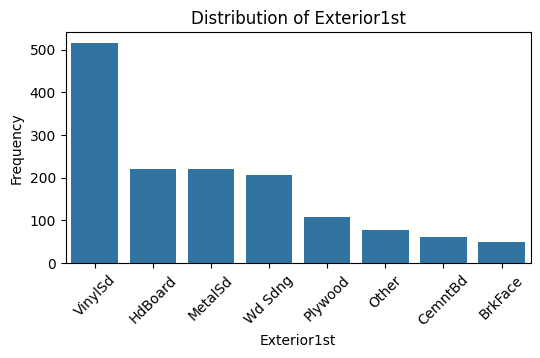

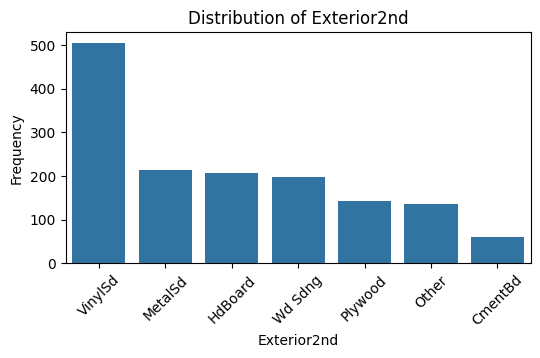

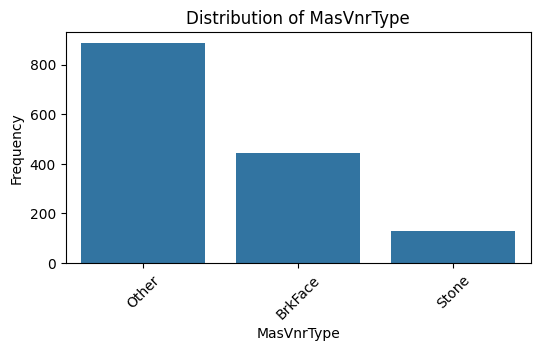

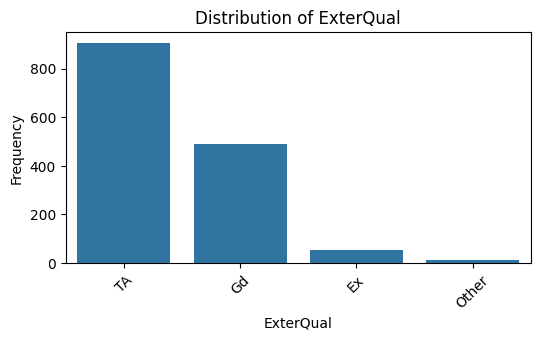

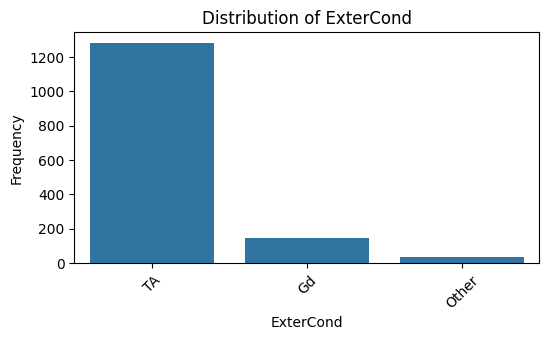

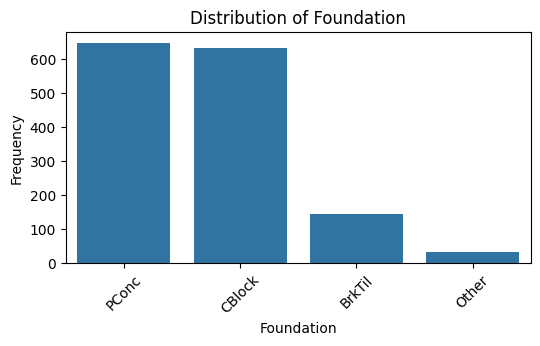

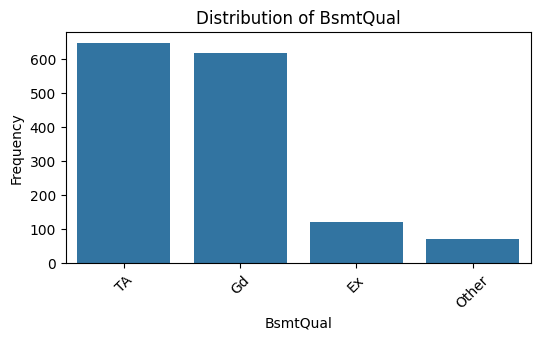

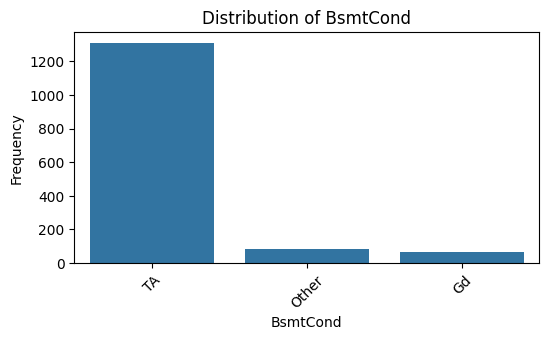

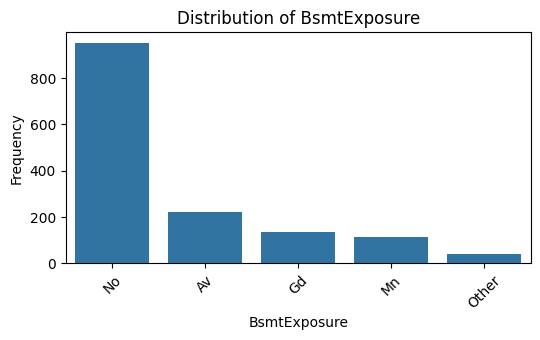

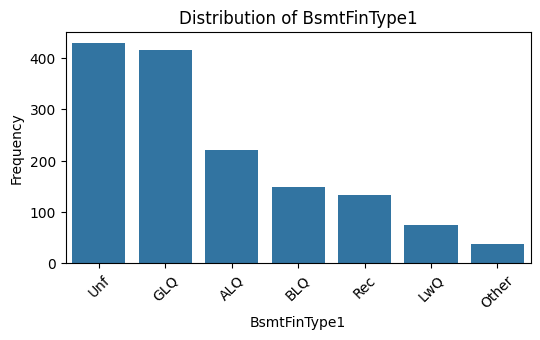

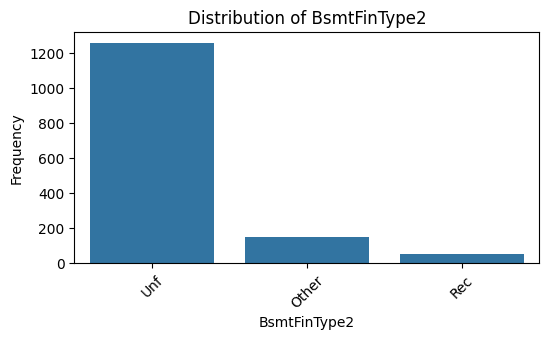

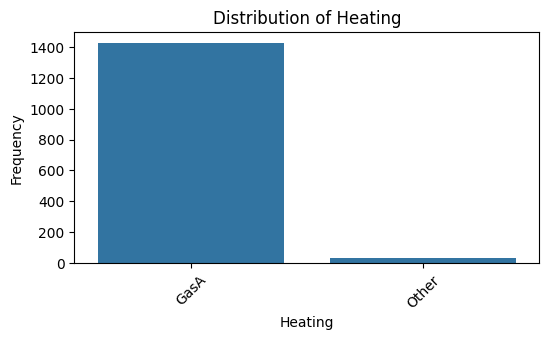

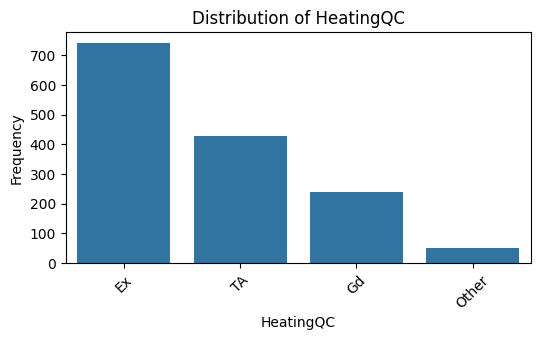

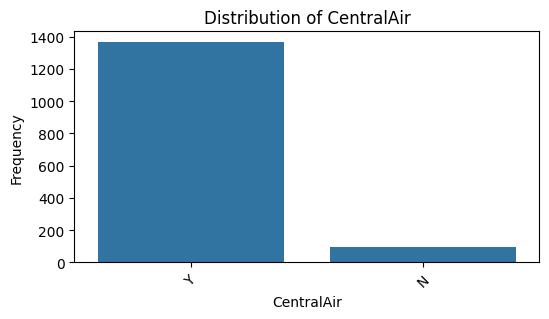

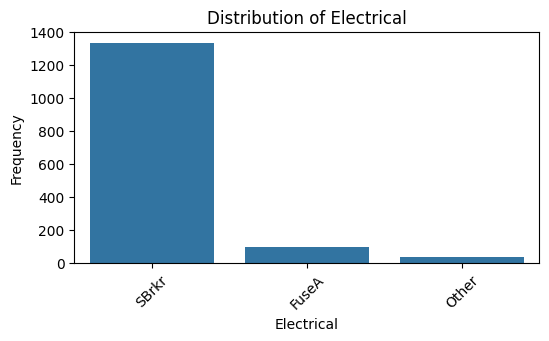

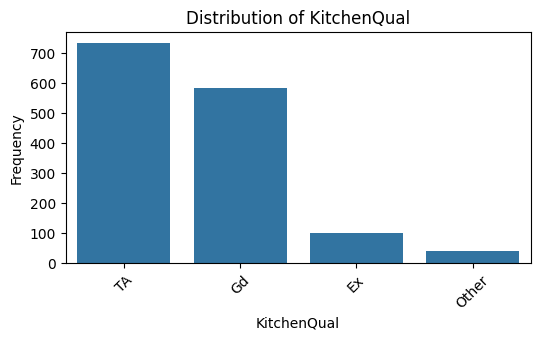

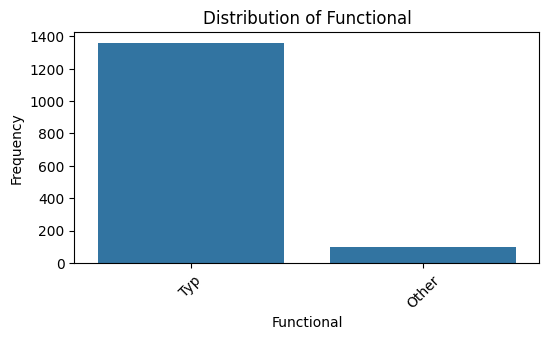

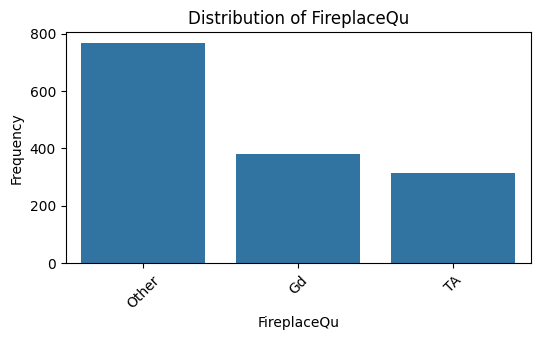

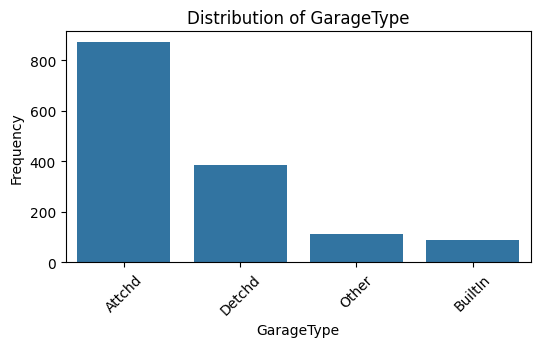

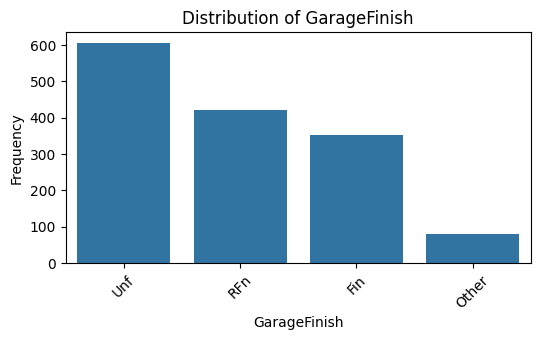

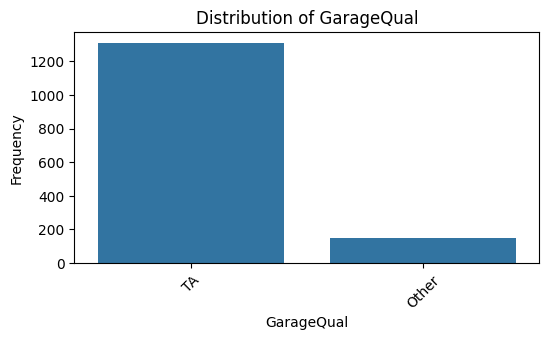

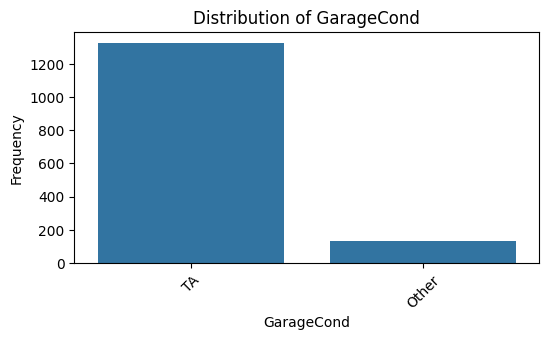

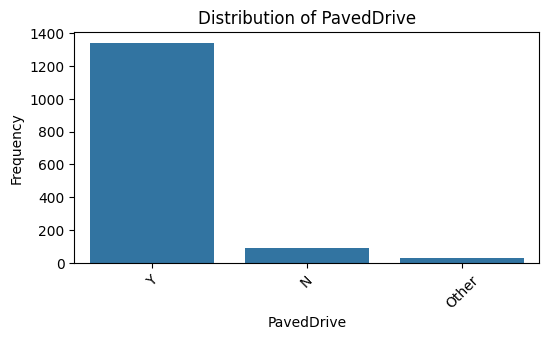

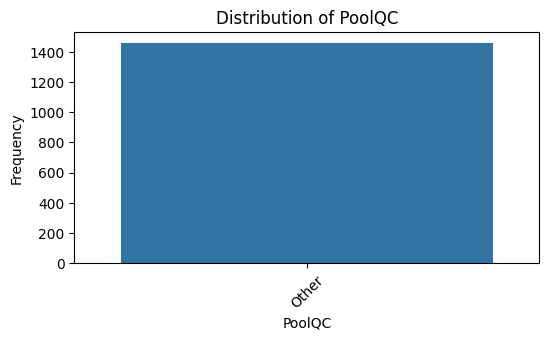

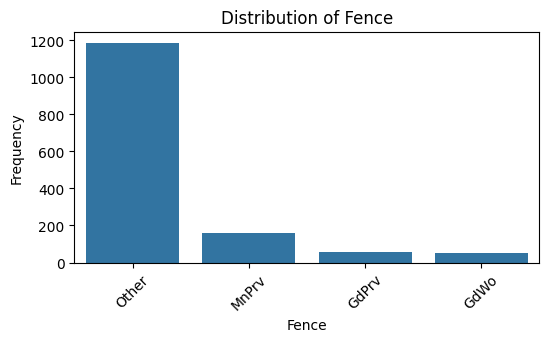

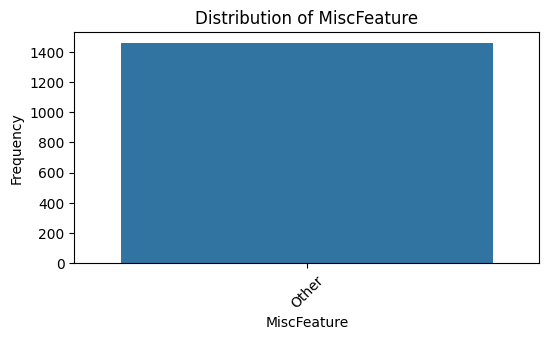

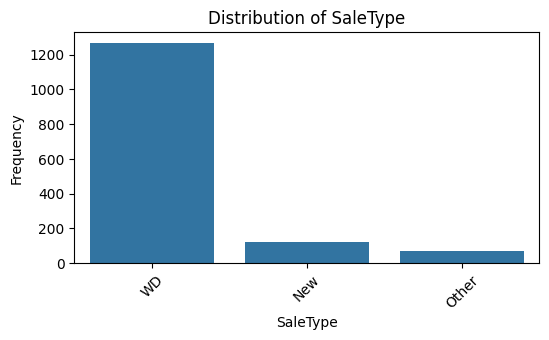

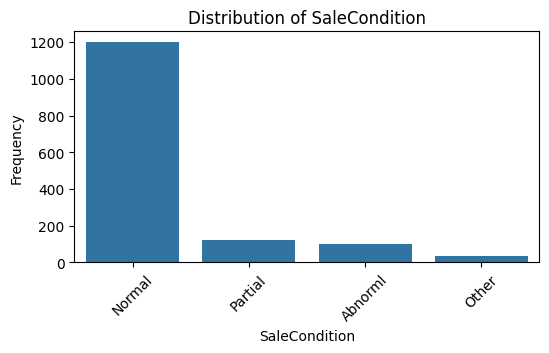

In [25]:
for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df_train[col], order=df_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### Correlation

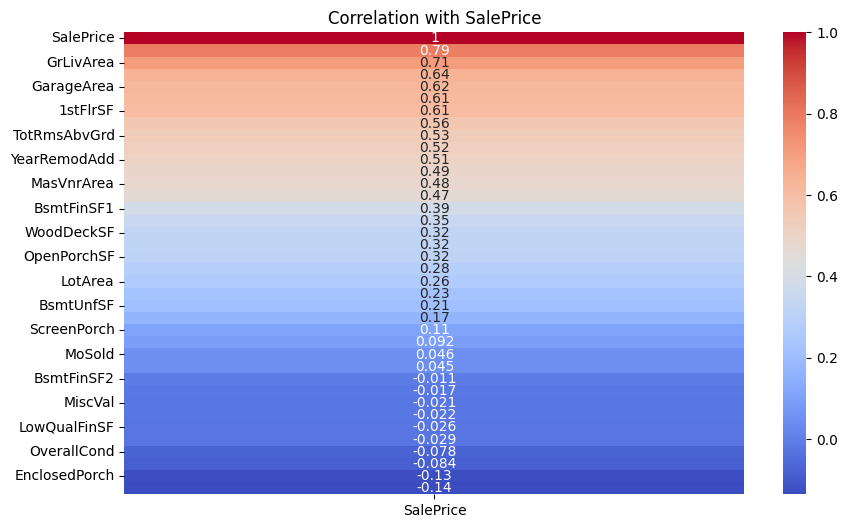

In [26]:
correlation = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

<Axes: >

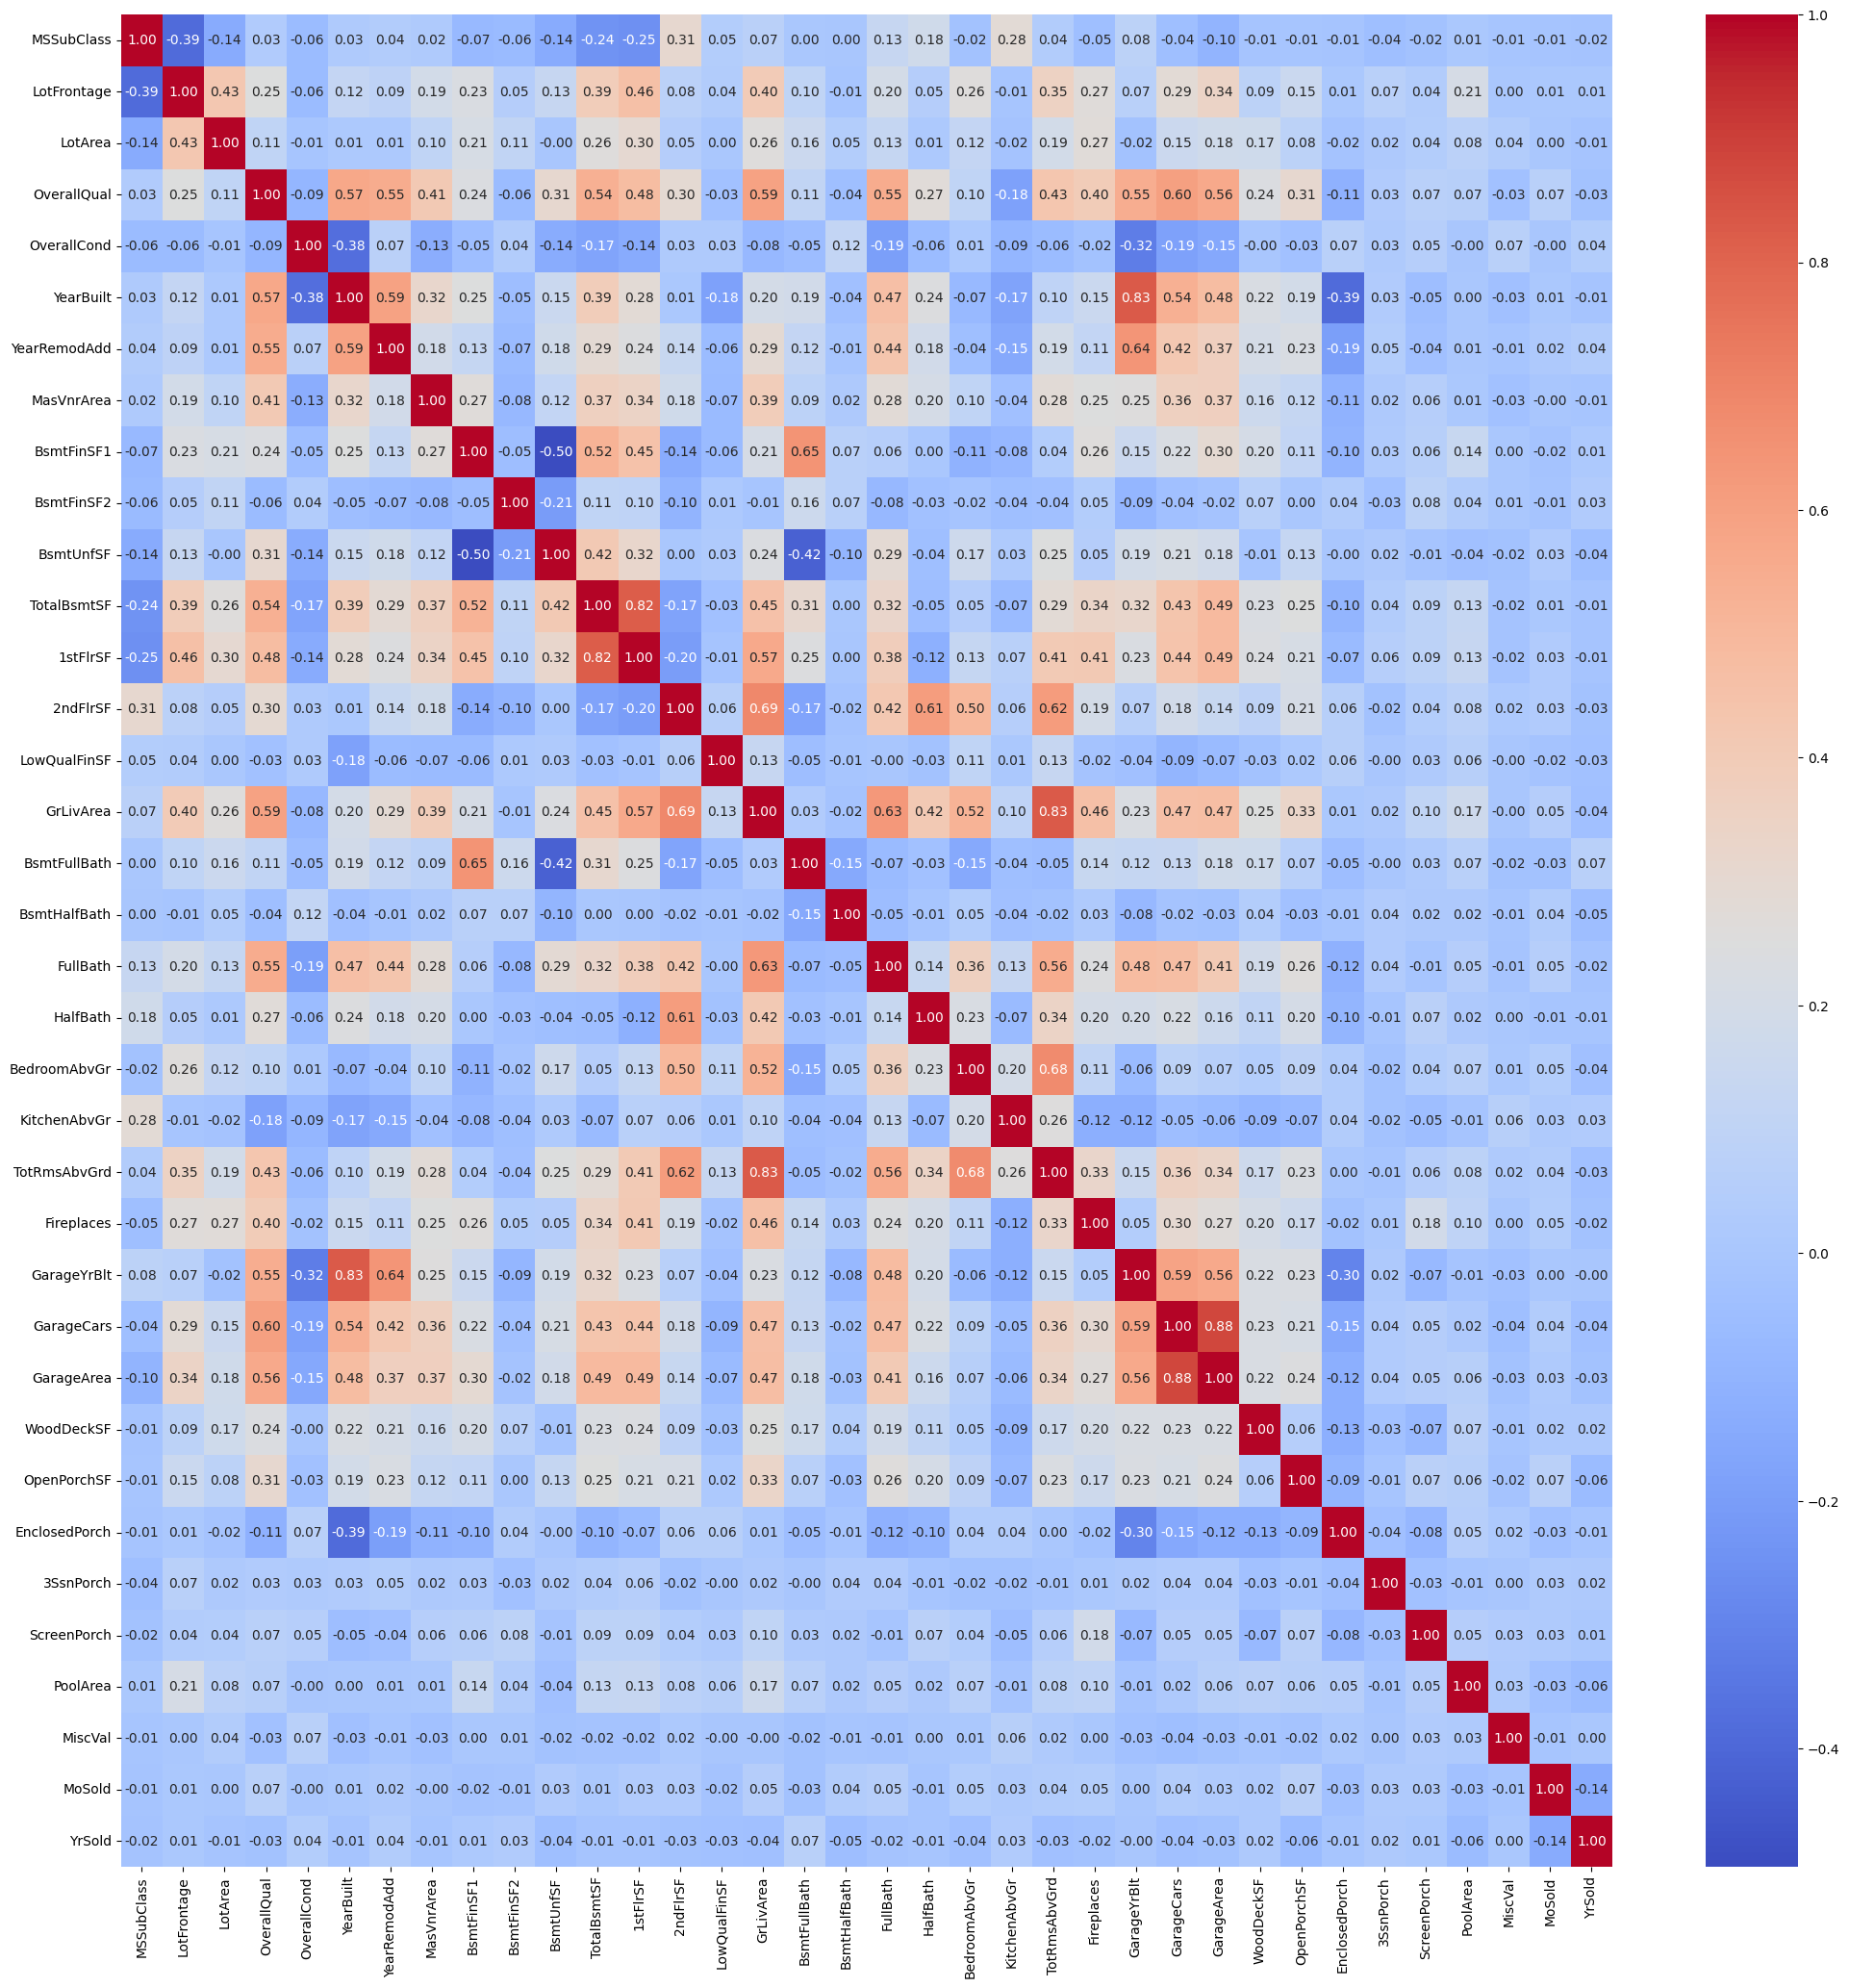

In [27]:
df_correlation = df_train.copy()
df_correlation = df_correlation.drop(['Id', 'SalePrice'], axis = 1)

corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Target variable
Our target value in this dataset is price - 'SalePrice', which is not well distributed



In [28]:
df_train['SalePrice'].value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
110000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

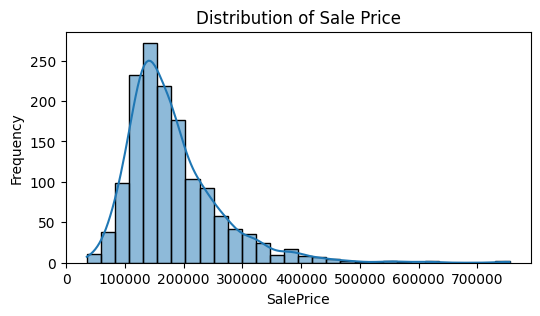

In [29]:
plt.figure(figsize=(6, 3))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


### Data split into train and validation sets


In [110]:
from sklearn.model_selection import train_test_split

In [119]:
# check that all categories in validation are in train
def validate_categories(X_train, X_validation, categorical_columns):
    for col in categorical_columns:
        train_categories = set(X_train[col].unique())
        validation_categories = set(X_validation[col].unique())

        unknown_categories = validation_categories - train_categories
        if unknown_categories:
            print(f"In column '{col}' found categories that are not in train: {unknown_categories}")

In [120]:
y = df_train['SalePrice']
X = df_train.drop(columns=['SalePrice'])

# Split into Train + Test (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split Train into Train + Validation (75% of original data for Train, 25% for Validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Data preprocessing
- Handling missing values (LotFrontage - replacing missing values with the median, as the distribution is assymetric. The median is robust to outliers and better reflects the "central" tendency in the data than the mean if there are extreme values)
- For the variable GarageYrBlt (year of garage construction), missing values ​​are likely to be due to houses that do not have a garage. In such cases, we can replace missing values with 0.

In [121]:
median_value = X_train['LotFrontage'].median()

X_train['LotFrontage'] = X_train['LotFrontage'].fillna(median_value)
#X_validation['LotFrontage'].fillna(median_value, inplace=True)

print(f"Check missing values in the variable: {X_train['LotFrontage'].isnull().sum()}")

Check missing values in the variable: 0


In [122]:
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(0)
#X_validation['GarageYrBlt'].fillna(0, inplace=True)

print(f"Check missing values in the variable: {X_train['GarageYrBlt'].isnull().sum()}")

Check missing values in the variable: 0


In [123]:
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
#X_validation['MasVnrArea'] = X_validation['MasVnrArea'].fillna(X_validation['MasVnrArea'].median())

### Categorical columns encoding

In [124]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()

# Applying label encoding to categorical Variables with Order
ordered_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in ordered_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col].astype(str))
    X_val[col] = label_encoder.transform(X_val[col].astype(str))
    X_test[col] = label_encoder.transform(X_test[col].astype(str))

# One-Hot Encoding

columns_for_onehot = [col for col in categorical_columns if col not in ordered_columns]

# Convert to string data type
for col in columns_for_onehot:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
    X_val[col] = X_val[col].astype(str)

X_train = pd.get_dummies(X_train, columns=columns_for_onehot, drop_first=True)
X_test = pd.get_dummies(X_test, columns=columns_for_onehot, drop_first=True)
X_val = pd.get_dummies(X_val, columns=columns_for_onehot, drop_first=True)

# Convert bool columns to 0/1

bool_columns = X_train.select_dtypes(include=['bool']).columns
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)
X_val[bool_columns] = X_val[bool_columns].astype(int)

#bool_columns_val = X_validation.select_dtypes(include=['bool']).columns
#X_validation[bool_columns_val] = X_validation[bool_columns_val].astype(int)

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 98 to 562
Columns: 141 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(138)
memory usage: 970.7 KB


In [126]:
#X_validation.info()

Drop features with low correlation with target variable

In [127]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

selector = SelectKBest(mutual_info_regression, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'], dtype='object')


In [128]:
# leaving features with the highest score

X_train = X_train[selected_features]
X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
98,5,458,835,835,366
837,6,483,483,987,264
186,7,1188,1217,1217,497
842,6,1127,1165,1165,490
246,6,1020,908,1928,440
...,...,...,...,...,...
683,9,1626,1668,1668,702
702,8,1234,1264,2576,666
189,8,1593,1593,1593,682
1425,6,1252,1252,1252,528


In [129]:
X_test = X_test[selected_features]
X_val = X_val[selected_features]

### StandartScaler for Target variable
to transform the scale of the target variable



In [132]:
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_train_scaled = pd.Series(y_train_scaled.flatten(), index=y_train.index)

y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten(), index=y_test.index)

y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
y_val_scaled = pd.Series(y_val_scaled.flatten(), index=y_val.index)

print(y_train_scaled.head())

98    -1.208571
837   -0.992334
186   -0.063791
842   -0.039623
246   -0.521703
dtype: float64


## Regression

In [159]:
# Evaluate the model
def evaluate_model(regressor, y_pred):
    mse = mean_squared_error(y_test_scaled, y_pred)
    r2 = r2_score(y_test_scaled, y_pred)
    print("RMSE:", np.sqrt(mse))
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)

    # Calculate Train MSE
    if regressor == regressor_svr:
        y_train_pred = regressor.predict(X_train_scaled)
        train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    else:
        y_train_pred = regressor.predict(X_train)
        train_mse = mean_squared_error(y_train_scaled, y_train_pred)

    # Print the results
    print("Train MSE:", train_mse)
    print("Test MSE:", mse)

    # Compare the ratio of Train and Test MSE
    print("Test/Train MSE Ratio:", mse / train_mse)

### Random Forest (sklearn)

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees by default

# Train the model
rf_regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

print('Linear Regression Results:')
evaluate_model(rf_regressor, y_pred_rf)

Linear Regression Results:
Linear Regression Results:
RMSE: 0.3951371869989514
Mean Squared Error (MSE): 0.1561333965494443
R² Score: 0.8366014292231474
Train MSE: 0.030868642983038035
Test MSE: 0.1561333965494443
Test/Train MSE Ratio: 5.057993531987714


### Linear Regression

In [149]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()

# Train the model
lr_regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_lr = lr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_lr)
r2 = r2_score(y_test_scaled, y_pred_lr)

print('Linear Regression Results:')
evaluate_model(lr_regressor, y_pred_lr)

Linear Regression Results:
Linear Regression Results:
RMSE: 0.39770489094265815
Mean Squared Error (MSE): 0.1581691802797116
R² Score: 0.834470916730062
Train MSE: 0.23143516007486847
Test MSE: 0.1581691802797116
Test/Train MSE Ratio: 0.6834276184679304


###  XGBoost


In [156]:
#!pip3 install xgboost

In [155]:
import xgboost as xgb

# Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,       # Maximum depth of each tree
    random_state=42
)

# Train the model
model_xgb.fit(X_train, y_train_scaled)
y_pred_xgb = model_xgb.predict(X_test)

print('XGBoost Results:')
evaluate_model(model_xgb, y_pred_xgb)

XGBoost Results:
Linear Regression Results:
RMSE: 0.4017289941079638
Mean Squared Error (MSE): 0.16138618470699642
R² Score: 0.8311042191674769
Train MSE: 0.07718849170473306
Test MSE: 0.16138618470699642
Test/Train MSE Ratio: 2.0908062995237993


### Support Vector Regression (SVR)

In [157]:
# Feature Scaling because SVR is sensitive to the scale of features

from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [160]:
from sklearn.svm import SVR

# Initialize the SVR model
regressor_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
regressor_svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr = regressor_svr.predict(X_test_scaled)

print('SVR Results:')
evaluate_model(regressor_svr, y_pred_svr)

SVR Results:
RMSE: 0.3517178681076559
Mean Squared Error (MSE): 0.12370545874619442
R² Score: 0.8705382986398946
Train MSE: 0.17278255906953752
Test MSE: 0.12370545874619442
Test/Train MSE Ratio: 0.715960334262721
